## Clustering World Countries
### Members



*   Ankitha Lakshmisha
*   Fenil Niteshbhai Savani
*   Sharayu Shekhar Thosar



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
df  = pd.read_csv('World Indicators.csv')
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


# Data Cleaning

In [ ]:
#Dropping 'Energy Usage' & 'Lending Interest' which has more null values in column.
df.drop(labels='Energy Usage', axis = 1, inplace=True)
df.drop(labels='Lending Interest', axis = 1, inplace=True)
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
# Converting object datatype to float in following columns
# Also, removing special characters from the numbers in features column
df["Business Tax Rate"] = df["Business Tax Rate"].str.rstrip("%").astype("float") / 100
df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$', '').str.replace(',', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.521,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.659,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.195,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.435,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
# Same as previous task to convert datatype from object to float.
df['GDP'] = df['GDP'].astype(float)
df['Health Exp/Capita'] = df['Health Exp/Capita'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   GDP                     188 non-null    float64
 4   Health Exp % GDP        185 non-null    float64
 5   Health Exp/Capita       185 non-null    float64
 6   Hours to do Tax         180 non-null    float64
 7   Infant Mortality Rate   188 non-null    float64
 8   Internet Usage          199 non-null    float64
 9   Life Expectancy Female  197 non-null    float64
 10  Life Expectancy Male    197 non-null    float64
 11  Mobile Phone Usage      196 non-null    float64
 12  Population 0-14         191 non-null    float64
 13  Population 15-64        191 non-null    float64
 14  Population 65+          191 non-null    fl

In [ ]:
# Removing rows which have more than 7 Null values 
df.drop(df[df.isnull().sum(axis=1)>12].index.tolist(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 207
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              198 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   GDP                     188 non-null    float64
 4   Health Exp % GDP        185 non-null    float64
 5   Health Exp/Capita       185 non-null    float64
 6   Hours to do Tax         180 non-null    float64
 7   Infant Mortality Rate   188 non-null    float64
 8   Internet Usage          199 non-null    float64
 9   Life Expectancy Female  196 non-null    float64
 10  Life Expectancy Male    196 non-null    float64
 11  Mobile Phone Usage      196 non-null    float64
 12  Population 0-14         191 non-null    float64
 13  Population 15-64        191 non-null    float64
 14  Population 65+          191 non-null    fl

In [ ]:
#Scaling the data by MinMaxScaler
scaler = MinMaxScaler()
df[['Business Tax Rate','Days to Start Business','GDP']] = \
  scaler.fit_transform(df[['Business Tax Rate',
                           'Days to Start Business','GDP']])
  
df[['Health Exp/Capita','Hours to do Tax','Life Expectancy Female']] = \
  scaler.fit_transform(df[['Health Exp/Capita','Hours to do Tax',
                           'Life Expectancy Female']])
  
df[['Life Expectancy Male','Mobile Phone Usage']] = \
 scaler.fit_transform(df[['Life Expectancy Male','Mobile Phone Usage']])


df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.192319,0.034632,0.012804,0.044,0.022332,0.169629,0.023,0.1,0.642857,0.666667,0.36,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.132144,0.093795,0.006692,0.034,0.016774,0.104328,0.107,0.1,0.190476,0.138889,0.20,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.173874,0.040404,0.000459,0.045,0.002223,0.099691,0.060,0.0,0.357143,0.361111,0.32,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.033565,0.085137,0.000973,0.052,0.039612,0.054096,0.039,0.1,0.023810,0.055556,0.60,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.106138,0.017316,0.000658,0.064,0.002728,0.099691,0.068,0.0,0.261905,0.277778,0.20,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.015,0.062594,0.057720,0.001513,0.053,0.093270,0.076507,0.020,0.6,0.666667,0.583333,0.56,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,0.115210,0.005772,1.000000,0.177,0.854386,0.067620,0.006,0.7,0.857143,0.861111,0.36,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,0.101300,0.008658,0.003030,0.088,0.121362,0.125193,0.010,0.5,0.833333,0.777778,0.56,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,0.164500,0.202020,0.020363,0.045,0.047999,0.329212,0.014,0.4,0.761905,0.722222,0.40,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
#Plotting box plots to identify outliers
fig = go.Figure()
for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

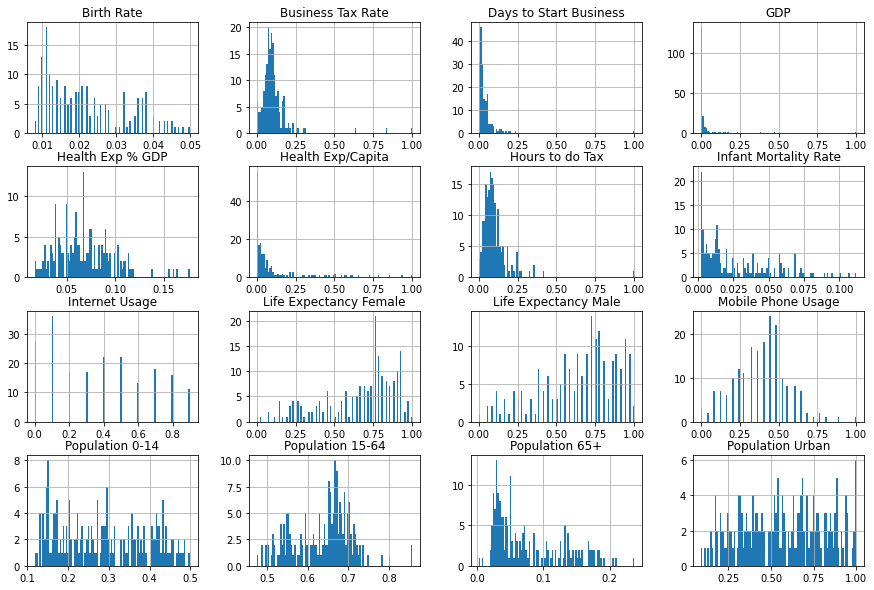

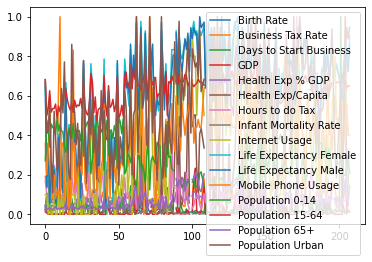

In [ ]:
#Plotting the histograms to understand the skewness
df.hist(figsize=(15,10),   bins = 100)
df.plot()

## Filling the Missing Value by Grouping Region with mean and median 
### Mean and median is decided by the box plots

In [ ]:
df3 = df.groupby("Region")

#The missing values are filled by medians in case of outliers, otherwise mean.

# "Business Tax Rate" & "Days to Start Business", "Health Exp/Capita","Hours to do Tax" column have more outlier so we filled it by median
#median value is smaller than mean value it represent Skew Histograph

df["Business Tax Rate"] = df3.transform\
(lambda x: x.fillna(x.median()))["Business Tax Rate"]

df["Days to Start Business"] = df3.transform\
(lambda x: x.fillna(x.median()))["Days to Start Business"]

df["GDP"] =df3.transform\
(lambda x: x.fillna(x.median()))["GDP"]

df["Health Exp/Capita"] = df3.transform\
(lambda x: x.fillna(x.median()))["Health Exp/Capita"]

df["Hours to do Tax"] = df3.transform\
(lambda x: x.fillna(x.median()))["Hours to do Tax"]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning:

Dropping invalid 

In [ ]:
# This all column features have less outlier that's why i have filled by mean value of this column null value.
df["Birth Rate"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Birth Rate"]

df["Health Exp % GDP"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Health Exp % GDP"]

df["Infant Mortality Rate"] = df3.transform\
(lambda x: x.fillna(x.median()))["Infant Mortality Rate"]

df["Internet Usage"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Internet Usage"]

df["Life Expectancy Female"] = df3.transform\
(lambda x: x.fillna(x.median()))["Life Expectancy Female"]

df["Life Expectancy Male"] = df3.transform\
(lambda x: x.fillna(x.median()))["Life Expectancy Male"]

df["Mobile Phone Usage"] = df3.transform\
(lambda x: x.fillna(x.median()))["Mobile Phone Usage"]

df["Population 0-14"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Population 0-14"]

df["Population 15-64"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Population 15-64"]

df["Population 65+"] = df3.transform\
(lambda x: x.fillna(x.median()))["Population 65+"]

df["Population Urban"] = df3.transform\
(lambda x: x.fillna(x.mean()))["Population Urban"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Dropping invalid co

## Displaying Final Dataset after Cleaning

In [ ]:
df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.192319,0.034632,0.012804,0.044000,0.022332,0.169629,0.023,0.1,0.642857,0.666667,0.36,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.132144,0.093795,0.006692,0.034000,0.016774,0.104328,0.107,0.1,0.190476,0.138889,0.20,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.173874,0.040404,0.000459,0.045000,0.002223,0.099691,0.060,0.0,0.357143,0.361111,0.32,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.033565,0.085137,0.000973,0.052000,0.039612,0.054096,0.039,0.1,0.023810,0.055556,0.60,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.106138,0.017316,0.000658,0.064000,0.002728,0.099691,0.068,0.0,0.261905,0.277778,0.20,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.015,0.062594,0.057720,0.001513,0.053000,0.093270,0.076507,0.020,0.6,0.666667,0.583333,0.56,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,0.115210,0.005772,1.000000,0.177000,0.854386,0.067620,0.006,0.7,0.857143,0.861111,0.36,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,0.101300,0.008658,0.003030,0.088000,0.121362,0.125193,0.010,0.5,0.833333,0.777778,0.56,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,0.164500,0.202020,0.020363,0.045000,0.047999,0.329212,0.014,0.4,0.761905,0.722222,0.40,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


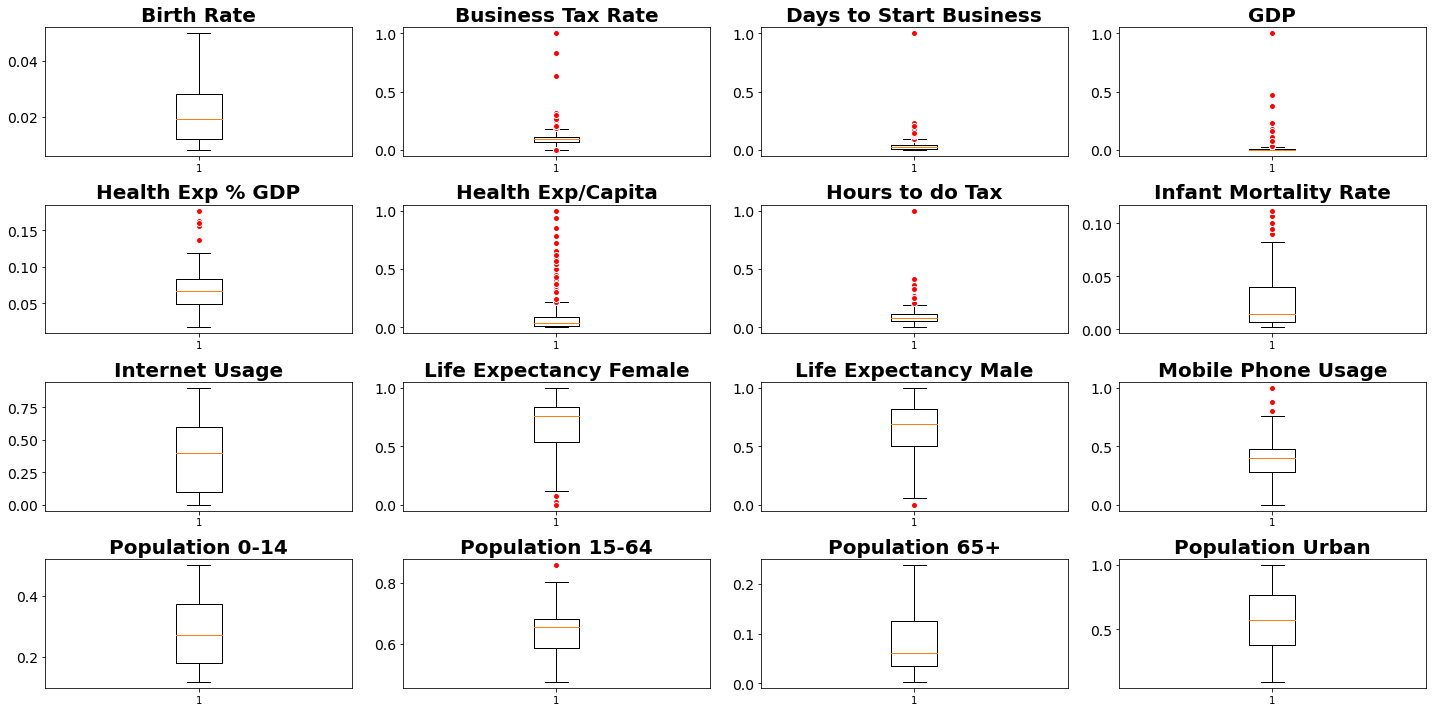

In [ ]:
# Boxplot of This dataframe which has no Null values have same boxplot to the previous dataset
import matplotlib.pyplot as plt

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(4, 4, figsize=(20,10))

for i , ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=red_circle)
  ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()

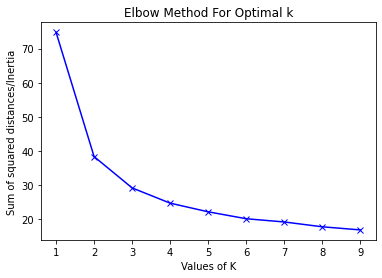

In [ ]:
#Applying elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df.iloc[:,0:16]) #world indicators dataframe 
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

## Applying Kmeans

In [ ]:
#with cluster value as 2 we are finding the SSE
from sklearn.cluster import KMeans
world_indicators = KMeans(n_clusters=2)
world_indicators.fit(df.iloc[:,0:16])
print('SSE world indicators: '+ str(world_indicators.inertia_))

SSE world indicators: 38.3734432648522


### Internal Validation score for K-means clusterings

## Equation for Evaluations


*   Silhouette Score = $\frac{(b-a)}{max(a,b}$
*   Dunn Index = $\frac{min(Intercluster Difference)}{max(Intracluster Difference)}$








In [ ]:
#code to find the silhouette score of K-means Clustering
from sklearn.metrics import silhouette_score
score = silhouette_score(df.iloc[:,0:16], world_indicators.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.405


In [ ]:
df['Cluster'] = world_indicators.labels_
df['Cluster']

0      1
1      1
2      1
3      1
4      1
      ..
202    0
204    0
205    0
206    0
207    0
Name: Cluster, Length: 203, dtype: int32

In [ ]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#calculate the Dunn Index of K-means Clustering
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_indicator = pairwise_distances(df.iloc[:,0:16])
dunn_indicator = dunn(dist_indicator,  world_indicators.labels_)
print('DI world indicators: '+ str(dunn_indicator))

DI world indicators: 0.09874044428879417


In [ ]:
#Calculate the CH Ratio of K-means Clustering 
from sklearn import metrics
print('CH world indicators: '+ str(metrics.calinski_harabasz_score(df.iloc[:,0:16], world_indicators.labels_)))

CH world indicators: 190.69797375005467


## Grouping Countries based on assigned class label

In [ ]:
# I have grouped Countries based on Class label which we have divided into 2 clusters
Developing = list(df.groupby('Cluster').get_group(0)['Country'])
Developed = list(df.groupby('Cluster').get_group(1)['Country'])
Group = pd.DataFrame({'Group1 Contries': pd.Series(Developing),\
                      'Group2 Countries': pd.Series(Developed)})

print("Total Group1 Contries:", len(Developing))
print("Total Group2 Countries:", len(Developed))
Group.head(15)

Total Group1 Contries: 117
Total Group2 Countries: 86


,Group1 Contries,Group2 Countries
0,"Egypt, Arab Rep.",Algeria
1,Libya,Angola
2,Mauritius,Benin
3,Morocco,Botswana
4,Seychelles,Burkina Faso
5,Tunisia,Burundi
6,Armenia,Cameroon
7,Azerbaijan,Central African Republic
8,Brunei Darussalam,Chad
9,China,Comoros


In [ ]:
# Plotting 3D scatterplot to visualize cluster of dataset  by K-means Clustering
import plotly.express as px
fig = px.scatter_3d(df, x = 'Population 0-14', y = 'Population 15-64', z ='Life Expectancy Female',
                    color = 'Cluster', opacity = 0.7, hover_data =['Country'])
fig

In [ ]:
# We have used GDP vs Infant Mortality Rate vs Life Expectancy Male to visualized data by K-means Clustering
import plotly.express as px
fig = px.scatter_3d(df, x = 'Infant Mortality Rate', y = 'Life Expectancy Male', z ='GDP',
                    color = 'Cluster', opacity = 0.7, hover_data =['Country'])
fig

In [ ]:
# We have used GDP vs Business Tax Rate vs Birth rate to visualized data by K-means Clustering
import plotly.express as px
fig = px.scatter_3d(df, x = 'Birth Rate', y = 'Business Tax Rate', z ='GDP',
                    color = 'Cluster', opacity = 0.7, hover_data =['Country'])
fig

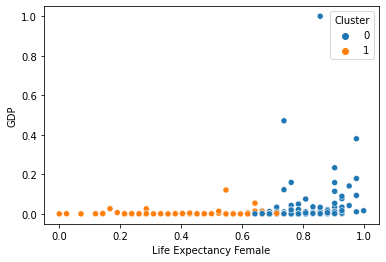

In [ ]:
#Plotting graph for Data Life Expectancy Female vs GDP
import seaborn as sns
sns.scatterplot(x='Life Expectancy Female',y='GDP',hue='Cluster',data=df)

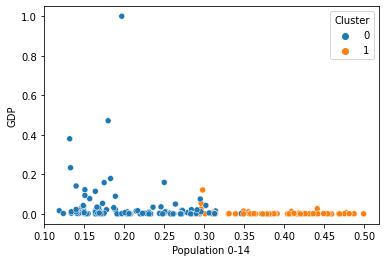

In [ ]:
#Plotting graph for Population 0-14 vs GDP
sns.scatterplot(x='Population 0-14',y='GDP',hue='Cluster',data=df)

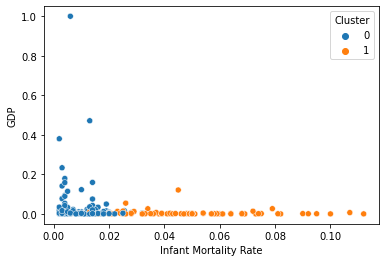

In [ ]:
#Plotting the graph for Infant Mortality Rate vs GDP
sns.scatterplot(x='Infant Mortality Rate',y='GDP',hue='Cluster',data=df)

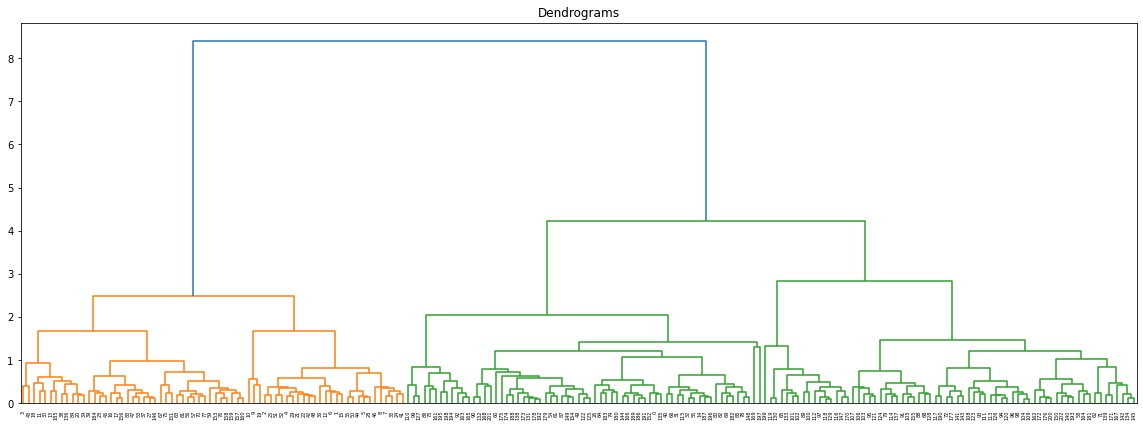

In [ ]:
#Plotting Dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:16], method='ward'))

## Applying Hierarchical Clustering

In [ ]:
#Perform Hierarchial Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
cluster.fit_predict(df.iloc[:,0:16])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

### Internal validation score for Hierarchical Clustering

## Equation for Evaluations


*   Silhouette Score = $\frac{(b-a)}{max(a,b}$
*   Dunn Index = $\frac{min(Intercluster Difference)}{max(Intracluster Difference)}$








In [ ]:
#calculate the Dunn Index of hierarchical Clustering of dataset with 2 clusters
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_indicator = pairwise_distances(df.iloc[:,0:16])
dunn_indicator = dunn(dist_indicator,  cluster.labels_)
print('DI world indicators: '+ str(dunn_indicator))

DI world indicators: 0.128710895739324


In [ ]:
#Calculate the CH Ratio of hierarchical Clustering of dataset with 2 clusters
from sklearn import metrics
print('CH world indicators: '+ str(metrics.calinski_harabasz_score(df.iloc[:,0:16], cluster.labels_)))

CH world indicators: 179.826920921039


In [ ]:
#Calculate the Silhouette Score of hierarchical Clustering of dataset with 2 clusters
from sklearn.metrics import silhouette_score
score = silhouette_score(df.iloc[:,0:16], cluster.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.405


Scatter Graph for Hierarchical Clustering  

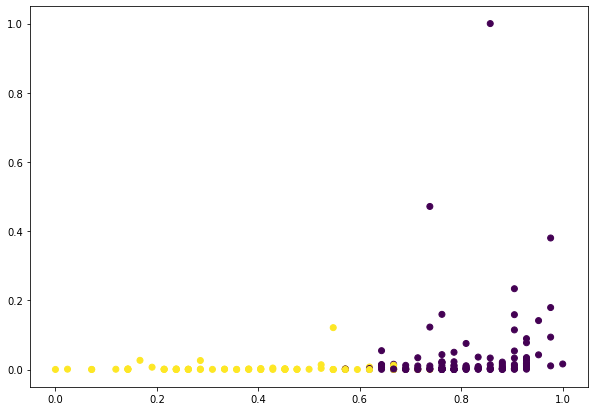

In [ ]:
#Plotting graph for Data Life Expectancy Female vs GDP after applying Hierarchial Clustering
plt.figure(figsize=(10, 7))  
plt.scatter(df['Life Expectancy Female'], df['GDP'], c=cluster.labels_)

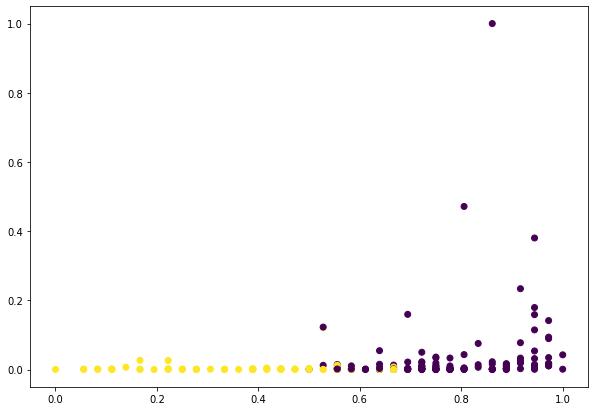

In [ ]:
#Plotting graph for Data Life Expectancy Male vs GDP after applying Hierarchial Clustering
plt.figure(figsize=(10, 7))  
plt.scatter(df['Life Expectancy Male'], df['GDP'], c=cluster.labels_)

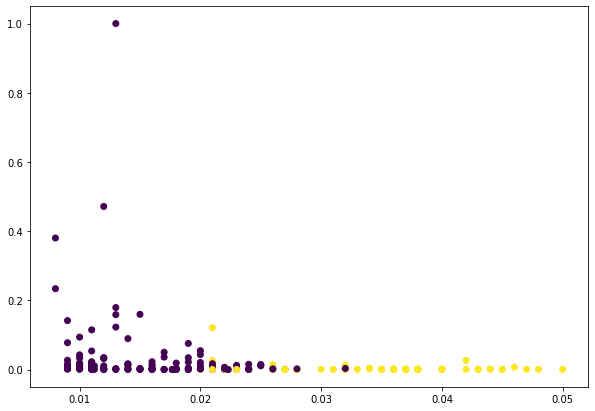

In [ ]:
#Plotting graph for Data Life Birth Rate vs GDP after applying Hierarchial Clustering
plt.figure(figsize=(10, 7))  
plt.scatter(df['Birth Rate'], df['GDP'], c=cluster.labels_)